**Objective:** The objective of this notebook is to prepare the model by training and cleaning the data. It'll be the first version of the model

# **Setup:**

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 16
version = 1

In [3]:
!pip install -Uqq fastai fastbook nbdev

In [4]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *
from PIL import Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/My Drive/image_processing/fruit_recognizer

/content/drive/My Drive/image_processing/fruit_recognizer


# **Data Fetch:**

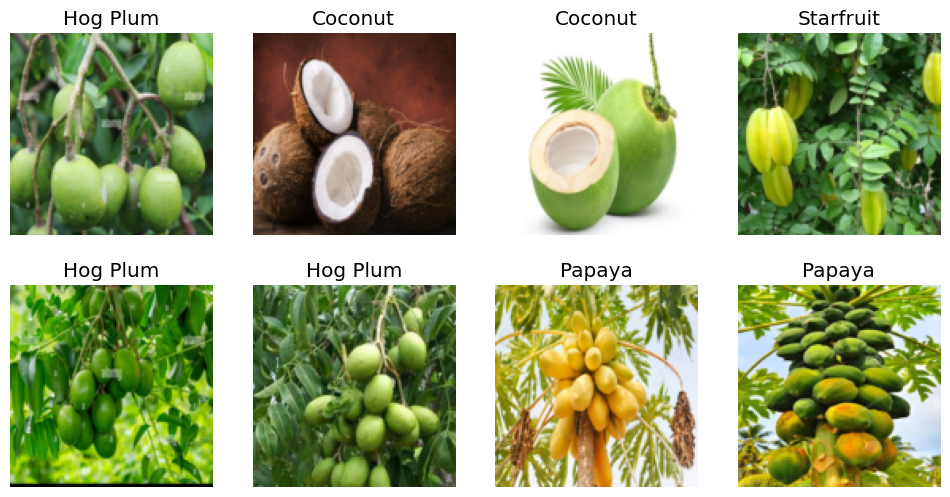

In [8]:
data_path = 'data'

def is_valid_image(file):
    try:
        with Image.open(file) as img:  # Open the image
            img.verify()  # Verify integrity
        return True
    except:
        return False

def get_valid_images(path):
    return [f for f in get_image_files(path) if is_valid_image(f)]  # Ensures only valid images are used

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_valid_images,  # Use the filtered image list
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = dblock.dataloaders(data_path, bs=bs)  # Ensure `bs` is defined
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs=bs)

dls.valid.show_batch(max_n=8, nrows=2)

In [24]:
dataloader_path = "dataloader"
if not os.path.exists(dataloader_path):
    os.mkdir(dataloader_path)
torch.save(dls, f'{dataloader_path}/fruit_recognizer_dataloader_v1.pth')

# **Training and saving model:**

In [9]:
model_path = "models"

In [10]:
model = vision_learner(dls, resnet18, metrics=[error_rate, accuracy])

In [11]:
dls.train.vocab

['Banana', 'Coconut', 'Guava', 'Hog Plum', 'Jackfruit', 'Litchi', 'Mango', 'Papaya', 'Starfruit', 'Watermelon', 'Wood Apple']

In [12]:
model.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.964007,1.695277,0.478022,0.521978,01:41


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.787613,1.254939,0.357143,0.642857,00:24
1,1.524084,1.118248,0.368132,0.631868,00:23
2,1.277874,1.070938,0.313187,0.686813,00:25
3,1.090608,1.022431,0.302198,0.697802,00:24


In [13]:
model.export(f'{model_path}/fruit_recognizer_v{version}.pkl')

# **Model Interpretation:**

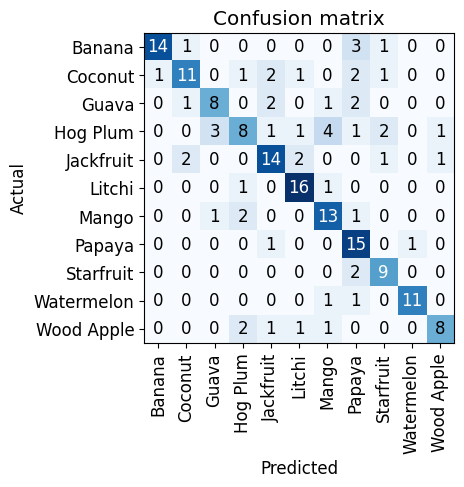

In [14]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

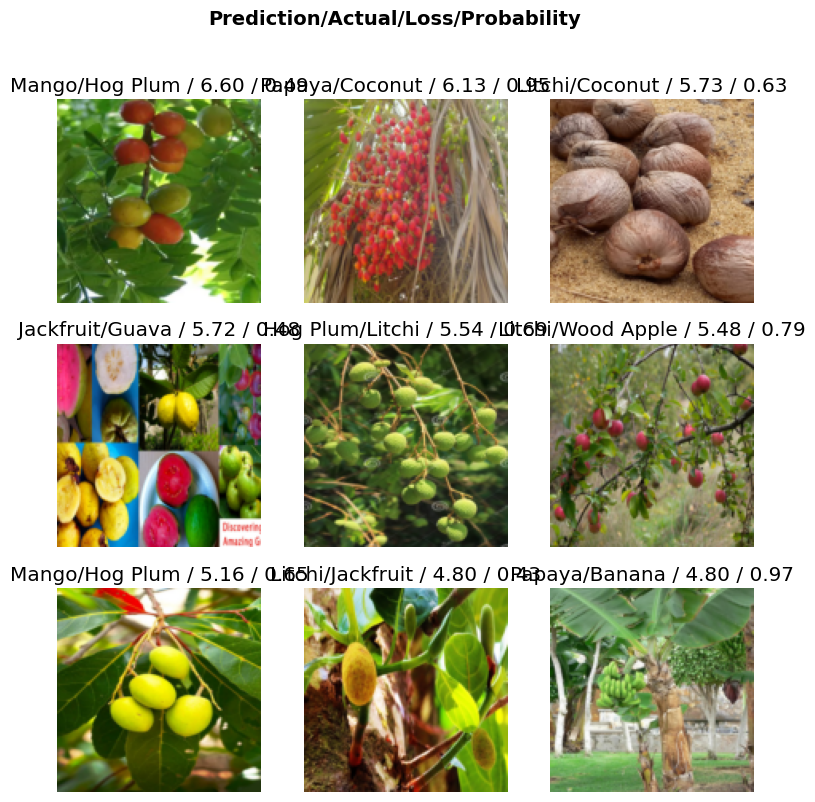

In [15]:
interp.plot_top_losses(9, nrows=3)

# **Train agian:**

In [16]:
version = 2

In [17]:
model = vision_learner(dls, resnet18, metrics=[error_rate, accuracy])

In [18]:
model.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.997263,1.538281,0.434066,0.565934,00:24


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.737600,1.306907,0.406593,0.593407,00:26
1,1.577110,1.226106,0.368132,0.631868,00:24
2,1.307214,0.995797,0.302198,0.697802,00:24
3,1.062145,1.055839,0.313187,0.686813,00:23
4,0.925372,1.095548,0.280220,0.719780,00:25
5,0.764257,1.052390,0.274725,0.725275,00:25
6,0.696113,1.024956,0.280220,0.719780,00:26
7,0.591135,1.041629,0.258242,0.741758,00:24


In [19]:
model.export(f'{model_path}/fruit_recognizer_v{version}.pkl')

# **Model interpretation - 2:**

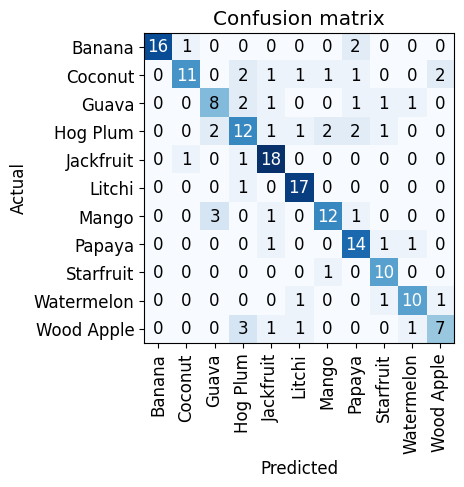

In [20]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

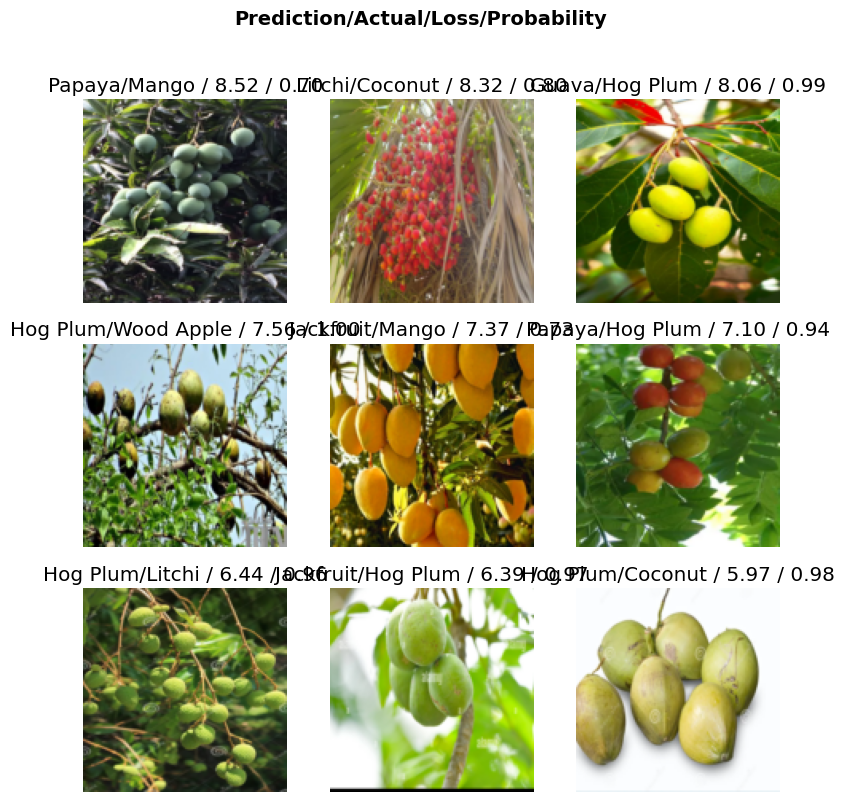

In [21]:
interp.plot_top_losses(9, nrows=3)